**You Only Look Once (YOLO)** is a CNN architecture for performing real-time object detection. The algorithm applies a single neural network to the full image, and then divides the image into regions and predicts bounding boxes and probabilities for each region. 
This model aims to count the number of cars and trucks detected in the input image using YOLOv4 object-detection algorithm.

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
class VehicleDetector:
    def __init__(self):
        # Load Network
        net = cv2.dnn.readNet("D:/Count number of vehicles in images/source code/dnn_model/yolov4.weights", 
                             "D:/Count number of vehicles in images/source code/dnn_model/yolov4.cfg")
        self.model = cv2.dnn_DetectionModel(net)
        self.model.setInputParams(size=(832,832), scale=1/255)
        
        # Allow classes containing cars and trucks only
        # Class 2 corresponds to cars while class 7 corresponds to trucks in yolo coco dataset
        self.classes_allowed = [2, 7]
        
    def detect_vehicles(self, img):
        # Detect Objects
        vehicle_boxes = []
        class_ids, scores, boxes = self.model.detect(img, nmsThreshold=0.4)
        
        for class_id, score, box in zip(class_ids, scores, boxes):
            # skip detection with low confidence score
            if score < 0.5:
                continue
            if class_id in self.classes_allowed:
                vehicle_boxes.append(box)
                
        return vehicle_boxes

img path C:/Users/jites/Downloads/ymeet-images/ymeet-images\balaji-srinivasan-hZNvounjE_0-unsplash.jpg
Number of Cars and Trucks: 9
img path C:/Users/jites/Downloads/ymeet-images/ymeet-images\michiel-annaert-pFeCiV0lUwI-unsplash.jpg
Number of Cars and Trucks: 14
img path C:/Users/jites/Downloads/ymeet-images/ymeet-images\Cars_driving_on_an_expressway.jpeg
Number of Cars and Trucks: 20


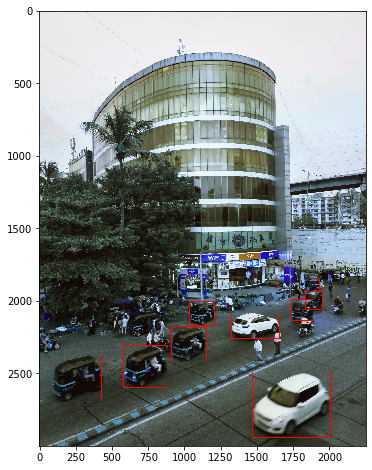

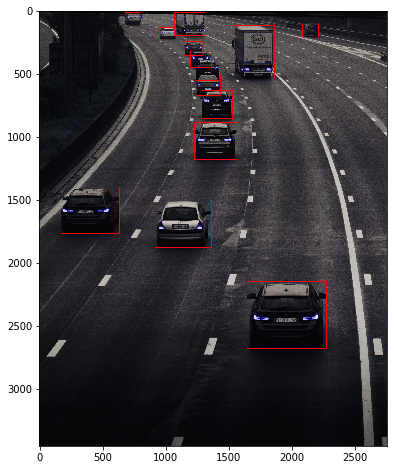

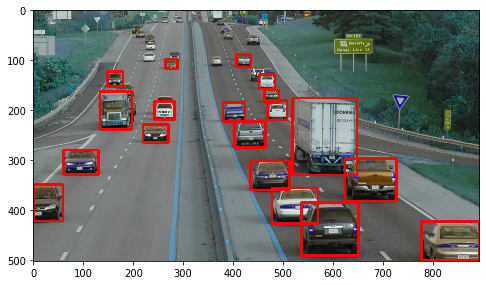

In [3]:
vd = VehicleDetector()

# Load images from the folder
im_dir = "C:/Users/jites/Downloads/ymeet-images/ymeet-images/"
ext = ['jpg', 'jpeg']

files = []
[files.extend(glob.glob(im_dir + "*" + e)) for e in ext]

# Loop through all the images
for img_path in files:
    print("img path", img_path)
    img = cv2.imread(img_path)
    
    vehicle_boxes = vd.detect_vehicles(img)
    vehicle_count = len(vehicle_boxes)
    
    for box in vehicle_boxes:
        x,y,w,h = box
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 3)
    
    plt.figure(figsize=(8,8))    
    plt.imshow(img)
    print("Number of Cars and Trucks: {}".format(str(vehicle_count)))

In the first image, the model counts auto rickshaws also as cars because there is no seperate class for auto rickshaw in the yolo-coco dataset. 